In [ ]:
from michigrad.engine import Value
from michigrad.visualize import show_graph

In [14]:
import importlib
import michigrad.nn
importlib.reload(michigrad.nn)
from michigrad.nn import Neuron, Layer, MLP

# Se definen los datos de entrada y datos de salida

xs = [[Value(0), Value(0)], [Value(0), Value(1)], [Value(1), Value(0)], [Value(1), Value(1)]]
ys = [Value(0), Value(1), Value(1), Value(0)]

# Se utiliza la funcion tanh como función de activación
model = MLP(2, [2, 1], nonlin="tanh")

In [15]:
lr = 0.01
epochs = 10000

# Iteramos 10000 veces

for _ in range(epochs):

    # Forward pass

    yhats = [model(x) for x in xs] 

    # loss (testear si a cada iteración disminuye)
    # calcula el mse de cada combinación del zip
    # divide por 4 para tener el promedio  
    L = sum([(y - yhat)**2 for y, yhat in zip(ys, yhats)])/4

    # zero grad
    for p in model.parameters():
        p.grad = 0.0

    # backward pass
    L.backward()

    # update weights
    for p in model.parameters():
        p.data -= p.grad * lr

    print(L.data)

0.5815311051895999
0.5482351670134518
0.5179126182362804
0.49030572854442717
0.4651781659865066
0.44231330809626046
0.42151268098978933
0.40259451636827714
0.3853924173842598
0.3697541251934988
0.35554037875024136
0.34262386103754383
0.33088822547668617
0.32022719674608024
0.3105437406725388
0.3017492982456745
0.2937630791569107
0.28651141058386964
0.2799271372333979
0.27394906892586696
0.2685214722526306
0.263593603070049
0.25911927680926317
0.25505647378254764
0.25136697685590914
0.24801603903474792
0.24497207867577273
0.24220640019475068
0.23969293828672977
0.2374080238136831
0.23533016964457756
0.23343987485512016
0.23171944580927564
0.23015283275245652
0.22872548064739426
0.2274241930784356
0.22623700813867728
0.22515308529724515
0.22416260232143667
0.2232566614006371
0.22242720368617933
0.22166693152388947
0.22096923771421048
0.2203281411887698
0.21973822854229252
0.21919460090509896
0.21869282568427895
0.21822889274124038
0.21779917460987036
0.21740039039325343
0.217029573007926

In [16]:
for x, y_true in zip(xs, ys):
    y_pred = model(x)
    print([xi.data for xi in x], "->", y_pred.data, "(esperado:", y_true.data, ")")


[0, 0] -> 1.9466250056332512e-07 (esperado: 0 )
[0, 1] -> 0.9999997836631961 (esperado: 1 )
[1, 0] -> 0.9999997843530769 (esperado: 1 )
[1, 1] -> 3.581342240543961e-07 (esperado: 0 )


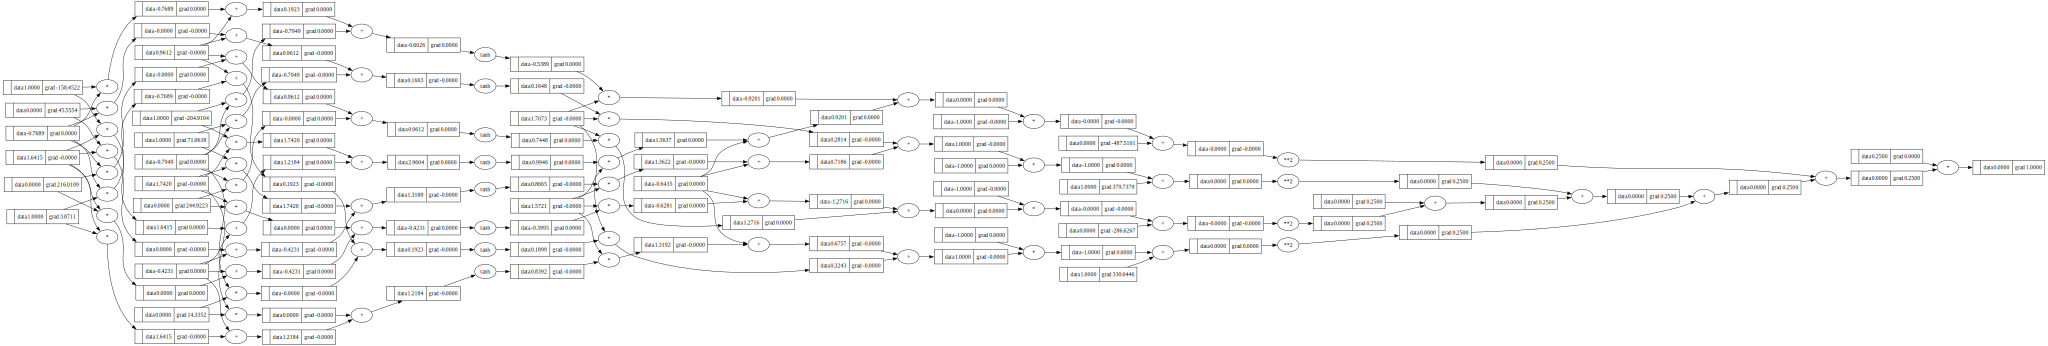

In [17]:
show_graph(L)